In [1]:
import numpy as np
import pandas as pd

In [2]:
drugs=pd.read_csv("InputsMV.csv")
patient=pd.read_csv("numerics.csv")

print(drugs.shape)
print(patient.shape)

(601, 14)
(2034, 6)


In [3]:
#NA analysis - no NAs (rate and rateuom are only available with continuous drugs)
print(drugs.isnull().sum(axis = 0),"\n")
print(patient.isnull().sum(axis = 0))

subject_id                    0
hadm_id                       0
starttime                     0
endtime                       0
label                         0
amount                        0
amountuom                     0
rate                        331
rateuom                     331
storetime                     0
ordercategorydescription      0
statusdescription             0
originalamount                0
originalrate                  0
dtype: int64 

Time       0
HR         0
PULSE      0
NBPSYS     0
NBPMEAN    0
RESP       0
dtype: int64


In [4]:
#We drop IDs since it is only one patient, and drop storetime because that only represents time of logging
drugs.drop(['subject_id','hadm_id','storetime'],axis=1,inplace=True)

#We drop any status of "Rewritten" because according to documentation this drug was not actually administered
drugs.drop(drugs.loc[drugs.statusdescription=='Rewritten'].index,axis=0,inplace=True)
drugs.reset_index()

,index,starttime,endtime,label,amount,amountuom,rate,rateuom,ordercategorydescription,statusdescription,originalamount,originalrate
0,0,11/17/2184 14:00,11/17/2184 20:30,NaCl 0.9%,65.000001,ml,10.000000,mL/hour,Continuous IV,Changed,1000.000000,10.000000
1,1,11/17/2184 14:50,11/17/2184 14:51,Labetalol,10.000001,mg,NaN,NaN,Drug Push,FinishedRunning,10.000000,10.000000
2,2,11/17/2184 18:10,11/17/2184 18:11,Lorazepam (Ativan),1.000000,mg,NaN,NaN,Drug Push,FinishedRunning,1.000000,1.000000
3,3,11/17/2184 18:12,11/17/2184 18:13,Lorazepam (Ativan),1.000000,mg,NaN,NaN,Drug Push,FinishedRunning,1.000000,1.000000
4,5,11/17/2184 20:30,11/18/2184 5:38,NaCl 0.9%,913.299978,ml,99.996348,mL/hour,Continuous IV,FinishedRunning,913.299990,99.996353
5,6,11/17/2184 20:30,11/17/2184 20:31,Heparin Sodium (Prophylaxis),1.000000,dose,NaN,NaN,Drug Push,FinishedRunning,1.000000,1.000000
6,8,11/17/2184 21:26,11/17/2184 21:27,Acyclovir,1.000000,dose,NaN,NaN,Drug Push,FinishedRunning,1.000000,1.000000
7,9,11/17/2184 21:26,11/17/2184 21:27,Dextrose 5%,100.000000,ml,NaN,NaN,Drug Push,FinishedRunning,100.000000,0.000000
8,10,11/17/2184 22:50,11/17/2184 22:51,Dextrose 5%,100.000000,ml,NaN,NaN,Drug Push,FinishedRunning,100.000000,0.000000
9,11,11/17/2184 22:50,11/17/2184 22:51,Piperacillin/Tazobactam (Zosyn),1.000000,dose,NaN,NaN,Drug Push,FinishedRunning,1.000000,1.000000


In [5]:
print(drugs.dtypes,"\n")
print(patient.dtypes)

starttime                    object
endtime                      object
label                        object
amount                      float64
amountuom                    object
rate                        float64
rateuom                      object
ordercategorydescription     object
statusdescription            object
originalamount              float64
originalrate                float64
dtype: object 

Time         int64
HR         float64
PULSE      float64
NBPSYS       int64
NBPMEAN      int64
RESP       float64
dtype: object


In [6]:
#Question 1
#Convert to date-time
drugs['endtime'] =  pd.to_datetime(drugs['endtime'])
drugs['starttime'] =  pd.to_datetime(drugs['starttime'])
patient['Time'] =  pd.to_datetime(patient['Time'],unit='s')

In [7]:
#Data Cleaning (Prep for question Question 3)
#Filter out any rows for drugs data that we do NOT have corresponding patient data for.

#Ensure dataframes are sorted by time
patient.sort_values(by=['Time'], axis=0,inplace=True)
drugs.sort_values(by=['starttime'], axis=0,inplace=True)

patient_start = patient.loc[0,'Time'] 
patient_end = patient.loc[patient.shape[0]-1,'Time'] 

mask = (drugs.loc[:,'starttime'] >= patient_start) & (drugs.loc[:,'endtime'] <= patient_end)

drugs = drugs.loc[mask,:]

In [8]:
#Data Engineering (Prep for question 4)
#Using the PATIENT'S timeline, plot the drug usage

patient['Time'] = patient['Time'].dt.strftime('%m/%d/%Y %H:%M')
drugs['starttime'] = drugs['starttime'].dt.strftime('%m/%d/%Y %H:%M')
drugs['endtime'] = drugs['endtime'].dt.strftime('%m/%d/%Y %H:%M')

#Create master dataframe which joins Patient and Drugs 
drugs2=drugs.copy()
drugs2.rename(index=str, columns={"starttime": "Time"},inplace=True)
merge=pd.merge(patient,drugs2, how='outer', on='Time')

#Filter master dataframe for 'Continuous Med' only..
continuous_meds = merge.loc[merge.ordercategorydescription == 'Continuous Med',:]
continuous_merged = pd.merge(merge,continuous_meds,how='outer',on='Time')

each_continuous_med = continuous_merged.label_y.value_counts().index

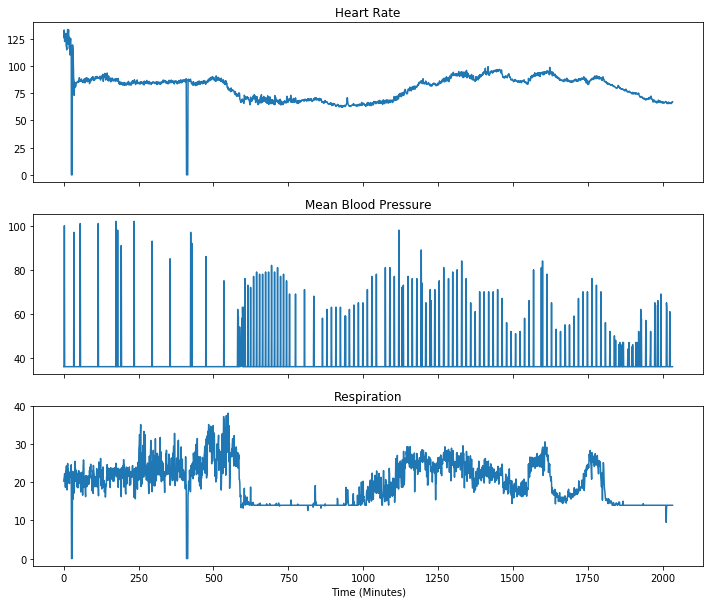

In [15]:
#Question 2
#Plot the vital signs
import matplotlib.pyplot as plt
import seaborn as sns
colors= sns.color_palette("hls", len(each_continuous_med))

fig, ax  = plt.subplots(nrows=3,sharex=True, figsize=(12,10)) 
ax[0].plot(np.arange(patient.Time.shape[0]),patient.HR)
ax[1].plot(np.arange(patient.Time.shape[0]),patient.NBPMEAN)
ax[2].plot(np.arange(patient.Time.shape[0]),patient.RESP )

ax[0].set_title('Heart Rate')
ax[1].set_title('Mean Blood Pressure')
ax[2].set_title('Respiration')

plt.xlabel("Time (Minutes)")
plt.show()

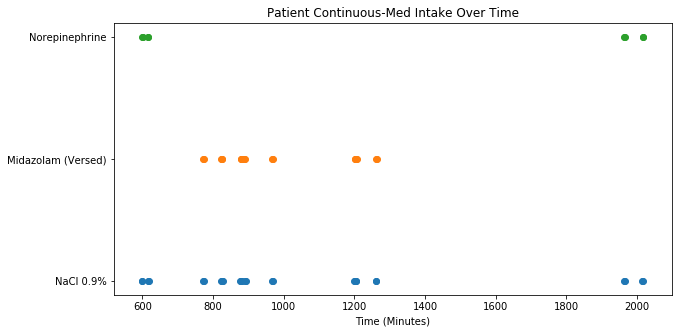

It is apparent Sodium Chloride is always paired with another drug


In [10]:
#Question 4
plt.figure(figsize=(10,5))


for i in range(len(each_continuous_med)):
    filtered = [i if x else np.nan for x in continuous_merged.label_y == each_continuous_med[i]]
    plt.scatter(np.arange(continuous_merged.Time.shape[0]),filtered)
    
plt.title("Patient Continuous-Med Intake Over Time")
plt.yticks(np.arange(len(each_continuous_med)), each_continuous_med)
plt.xlabel("Time (Minutes)")
plt.show()

print("It is apparent Sodium Chloride is always paired with another drug")

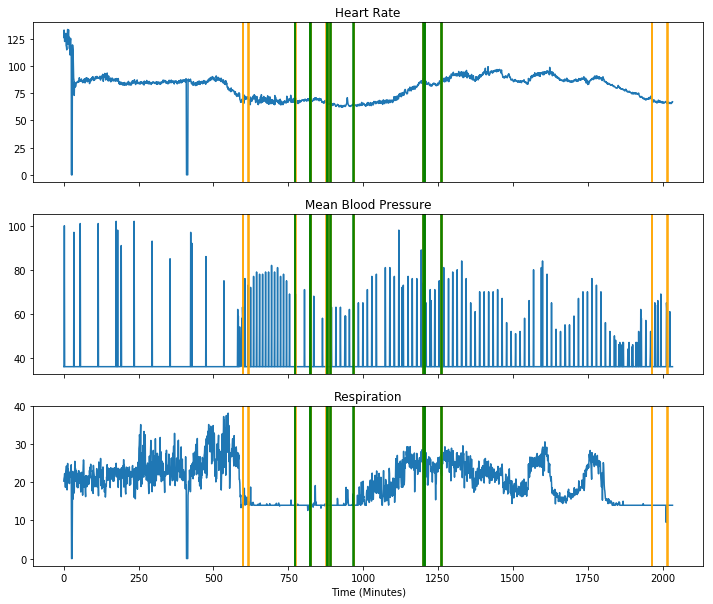

In [29]:
#View plots from questions 2 and 4 combined...

import matplotlib.pyplot as plt
import seaborn as sns
colors= sns.color_palette("hls", len(each_continuous_med))

fig, ax  = plt.subplots(nrows=3,sharex=True, figsize=(12,10)) 
ax[0].plot(np.arange(patient.Time.shape[0]),patient.HR)
ax[1].plot(np.arange(patient.Time.shape[0]),patient.NBPMEAN)
ax[2].plot(np.arange(patient.Time.shape[0]),patient.RESP )

ax[0].set_title('Heart Rate')
ax[1].set_title('Mean Blood Pressure')
ax[2].set_title('Respiration')

plt.xlabel("Time (Minutes)")

#Overlay drug intakes
colors=["orange","green"]
for i in range(len(each_continuous_med[1:])): #ignoring sodium nitrate since it is paired with every drug
    color=colors[i]
    for j in range(len(continuous_merged.label_y)):
        if continuous_merged.loc[j,'label_y'] == each_continuous_med[i]:
            ax[0].axvline(x=j,color=color)
            ax[1].axvline(x=j,color=color)
            ax[2].axvline(x=j,color=color)
        else:
            pass
    
plt.show()

We note that sample counts are statistically very low


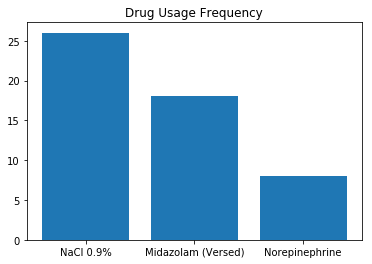

In [11]:
plt.bar(continuous_merged.label_y.value_counts().index,continuous_merged.label_y.value_counts())
plt.title("Drug Usage Frequency")
print("We note that sample counts are statistically very low")

In [38]:
HR_change_5min['Midazolam (Versed)']/np.max(np.abs(HR_change_5min['Midazolam (Versed)']))

array([-1.        , -0.04433198, -0.35668016, -0.13218623,  0.09068826,
        0.02125506, -0.14210526, -0.6145749 , -0.20161943, -0.15323887,
       -0.09068826,  0.30910931,  0.5465587 ,  0.34676113, -0.26093117,
       -0.39291498, -0.68603239, -0.71720648])

In [12]:
HR_change_5min = {}
HR_change_10min = {}
HR_change_15min = {}

NBP_change_5min = {}
NBP_change_10min = {}
NBP_change_15min = {}

RESP_change_5min = {}
RESP_change_10min = {}
RESP_change_15min = {}

for i in range(len(each_continuous_med)):
    time_of=continuous_merged.loc[continuous_merged.label_y==each_continuous_med[i],:].index
    
    #Collect Heart Rate changes
    HR_change_5min_i=[]
    HR_change_10min_i=[]
    HR_change_15min_i=[]
    
    for j1 in time_of:
        HR_change_5min_i.append(np.mean(continuous_merged.loc[j1:j1+5,'HR_x']) - np.mean(continuous_merged.loc[j1-5:j1,'HR_x']))
    HR_change_5min[each_continuous_med[i]] = HR_change_5min_i
    
    for j2 in time_of:
        HR_change_10min_i.append(np.mean(continuous_merged.loc[j2:j2+10,'HR_x']) - np.mean(continuous_merged.loc[j2-10:j2,'HR_x']))
    HR_change_10min[each_continuous_med[i]] = HR_change_10min_i
    
    for j3 in time_of:
        HR_change_15min_i.append(np.mean(continuous_merged.loc[j3:j3+15,'HR_x']) - np.mean(continuous_merged.loc[j3-15:j3,'HR_x']))
    HR_change_15min[each_continuous_med[i]] = HR_change_15min_i
    
    
    #Collect Blood Pressure changes
    NBP_change_5min_i=[]
    NBP_change_10min_i=[]
    NBP_change_15min_i=[]
    
    for k1 in time_of:
        NBP_change_5min_i.append(np.mean(continuous_merged.loc[k1:k1+5,'NBPMEAN_x']) - np.mean(continuous_merged.loc[k1-5:k1,'NBPMEAN_x']))
    NBP_change_5min[each_continuous_med[i]] = NBP_change_5min_i
    
    for k2 in time_of:
        NBP_change_10min_i.append(np.mean(continuous_merged.loc[k2:k2+10,'NBPMEAN_x']) - np.mean(continuous_merged.loc[k2-10:k2,'NBPMEAN_x']))
    NBP_change_10min[each_continuous_med[i]] = NBP_change_10min_i
    
    for k3 in time_of:
        NBP_change_15min_i.append(np.mean(continuous_merged.loc[k3:k3+15,'NBPMEAN_x']) - np.mean(continuous_merged.loc[k3-15:k3,'NBPMEAN_x']))
    NBP_change_15min[each_continuous_med[i]] = NBP_change_15min_i   
    
    
    #Collect Respiratory changes
    RESP_change_5min_i=[]
    RESP_change_10min_i=[]
    RESP_change_15min_i=[]
    
    for l1 in time_of:
        RESP_change_5min_i.append(np.mean(continuous_merged.loc[l1:l1+5,'RESP_x']) - np.mean(continuous_merged.loc[l1-5:l1,'RESP_x']))
    RESP_change_5min[each_continuous_med[i]] = RESP_change_5min_i
    
    for l2 in time_of:
        RESP_change_10min_i.append(np.mean(continuous_merged.loc[l2:l2+10,'RESP_x']) - np.mean(continuous_merged.loc[l2-10:l2,'RESP_x']))
    RESP_change_10min[each_continuous_med[i]] = RESP_change_10min_i
    
    for l3 in time_of:
        RESP_change_15min_i.append(np.mean(continuous_merged.loc[l3:l3+15,'RESP_x']) - np.mean(continuous_merged.loc[l3-15:l3,'RESP_x']))
    RESP_change_15min[each_continuous_med[i]] = RESP_change_15min_i       

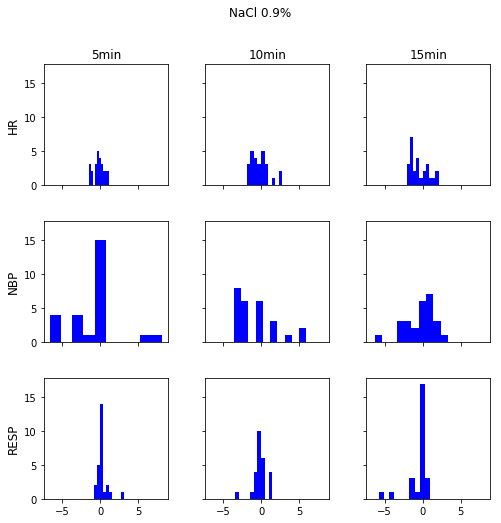

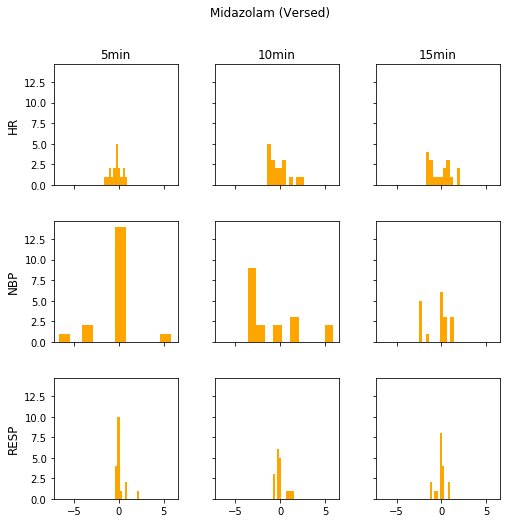

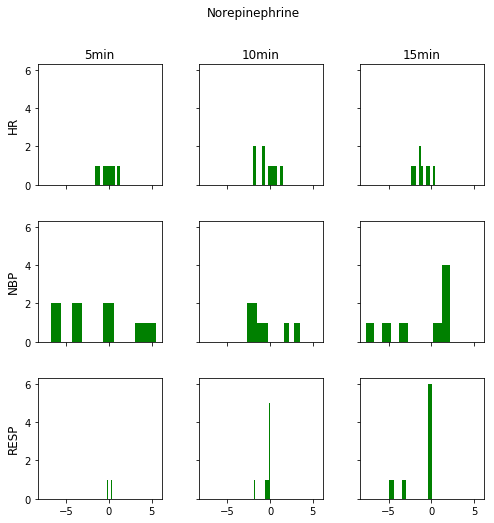

In [42]:
# colors=sns.color_palette("hls", len(each_continuous_med))
colors=['blue','orange','green']

for i in range(len(each_continuous_med)):
    fig, ax  = plt.subplots(nrows=3,ncols=3,figsize=(8,8),sharex=True, sharey=True) 
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.3)
    fig.suptitle(each_continuous_med[i])
    
    
    ax[0,0].hist(HR_change_5min[each_continuous_med[i]],color=colors[i])
    ax[0,1].hist(HR_change_10min[each_continuous_med[i]],color=colors[i])
    ax[0,2].hist(HR_change_15min[each_continuous_med[i]],color=colors[i])

    ax[1,0].hist(NBP_change_5min[each_continuous_med[i]],color=colors[i]) 
    ax[1,1].hist(NBP_change_10min[each_continuous_med[i]],color=colors[i]) 
    ax[1,2].hist(NBP_change_15min[each_continuous_med[i]],color=colors[i]) 

    ax[2,0].hist(RESP_change_5min[each_continuous_med[i]],color=colors[i]) 
    ax[2,1].hist(RESP_change_10min[each_continuous_med[i]],color=colors[i]) 
    ax[2,2].hist(RESP_change_15min[each_continuous_med[i]],color=colors[i]) 
    
    #Titles
    for top, name in zip(ax[0], ["5min","10min","15min"]):
        top.set_title(name)

    for side, name in zip(ax[:,0], ["HR","NBP","RESP"]):
        side.set_ylabel(name, rotation=90, size='large')

In [14]:
#Question 6
drugs.groupby(by='label').agg(['min','mean','max']).round(1)

amount                  rate                \
                                   min   mean     max    min   mean    max   
label                                                                        
Acyclovir                          1.0    1.0     1.0    NaN    NaN    NaN   
Calcium Gluconate                  2.0    2.0     2.0    NaN    NaN    NaN   
Dextrose 5%                       50.0   90.0   100.0  200.0  200.0  200.0   
Dextrose 50%                      25.0   33.3    50.0    NaN    NaN    NaN   
Fosphenytoin                     100.0  133.3   200.0    NaN    NaN    NaN   
Heparin Sodium (Prophylaxis)       1.0    1.0     1.0    NaN    NaN    NaN   
Insulin - Humalog                  2.0    2.0     2.0    NaN    NaN    NaN   
Keppra                           750.0  833.3  1000.0    NaN    NaN    NaN   
Labetalol                         10.0   10.0    10.0    NaN    NaN    NaN   
Lorazepam (Ativan)                 1.0    1.0     1.0    NaN    NaN    NaN   
Magnesium Sulfate                  2.0    2.0     2.0    NaN    NaN    NaN   
Midazolam (Versed)                 0.4    3.3    30.9    1.0    2.3    5.0   
NaCl 0.9%                          0.4  329.2  1000.0    1.0   54.6  256.7   
Norepinephrine                     0.1    0.1     0.2    0.1    0.1    0.1   
Piperacillin/Tazobactam (Zosyn)    1.0    1.0     1.0    NaN    NaN    NaN   
Potassium Chloride                40.0   40.0    40.0    NaN    NaN    NaN   

                                originalamount                originalrate  \
                                           min   mean     max          min   
label                                                                        
Acyclovir                                  1.0    1.0     1.0          1.0   
Calcium Gluconate                          2.0    2.0     2.0          0.0   
Dextrose 5%                               50.0   90.0   100.0          0.0   
Dextrose 50%                              25.0   33.3    50.0         25.0   
Fosphenytoin                             100.0  133.3   200.0        100.0   
Heparin Sodium (Prophylaxis)               1.0    1.0     1.0          1.0   
Insulin - Humalog                          2.0    2.0     2.0          2.0   
Keppra                                   750.0  833.3  1000.0        750.0   
Labetalol                                 10.0   10.0    10.0         10.0   
Lorazepam (Ativan)                         1.0    1.0     1.0          1.0   
Magnesium Sulfate                          2.0    2.0     2.0          0.0   
Midazolam (Versed)                         0.5   45.1   100.0          0.5   
NaCl 0.9%                                 50.0  494.7  1000.0          1.0   
Norepinephrine                             7.8    7.9     8.0          0.1   
Piperacillin/Tazobactam (Zosyn)            1.0    1.0     1.0          1.0   
Potassium Chloride                        40.0   40.0    40.0          0.2   

                                                
                                  mean     max  
label                                           
Acyclovir                          1.0     1.0  
Calcium Gluconate                  0.0     0.0  
Dextrose 5%                       40.0   200.0  
Dextrose 50%                      33.3    50.0  
Fosphenytoin                     133.3   200.0  
Heparin Sodium (Prophylaxis)       1.0     1.0  
Insulin - Humalog                  2.0     2.0  
Keppra                           833.3  1000.0  
Labetalol                         10.0    10.0  
Lorazepam (Ativan)                 1.0     1.0  
Magnesium Sulfate                  0.0     0.0  
Midazolam (Versed)                 1.6     5.0  
NaCl 0.9%                        229.6  1000.0  
Norepinephrine                     0.1     0.1  
Piperacillin/Tazobactam (Zosyn)    1.0     1.0  
Potassium Chloride                 0.2     0.2